# **Waze Project**

# Exploratory data analysis**

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>|


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Load the dataset into a dataframe

df = pd.read_csv('waze_dataset.csv')

### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?


SInce we are interested in user churn, the label column is essential. Besides label, variables that tie to user behaviors will be the most applicable. All variables tie to user behavior except ID.

ID can be dropped from the analysis since we are not interested in identifying a particular user. ID does not provide meaningful information about the churn (unless ID is assigned based on user sign-up time).

To check for missing data, we can use df.info() and inspect the Non-Null Count column. The difference between the number of non-nulls and the number of rows in the data is the number of missing values for the variable.

If the missing data are missing completely at random (MCAR), meaning that the reason for missingness is independent of the data values themselves, we can proceed with a complete-case analysis by removing the rows with missing values. Otherwise, we need to investigate the root cause of the missingness and make sure it won't interfere with the statistical inference and modeling.

#### **Data overview and summary statistics**

In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
df.size

194987

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [7]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


### **Task 3. Visualizations**

**Question:** What type of data visualization(s) will be most helpful?


Box plots will be helpful to determine outliers and where the bulk of the data points reside in terms of drives, sessions and all other continuous numeric variables.

Histograms are essential to understand the distribution of variables

Scatter plots will be helpful to visualize relationships between variables

Bar charts are useful for communicating levels and quantities, especially for categorical information

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

In [10]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


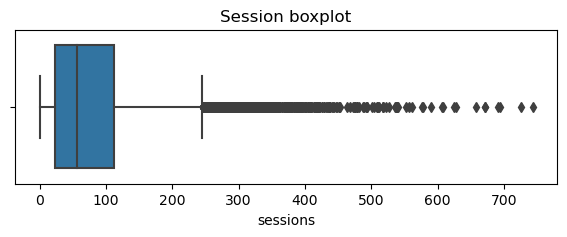

In [11]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['sessions'])
plt.title('Session boxplot')
plt.show()

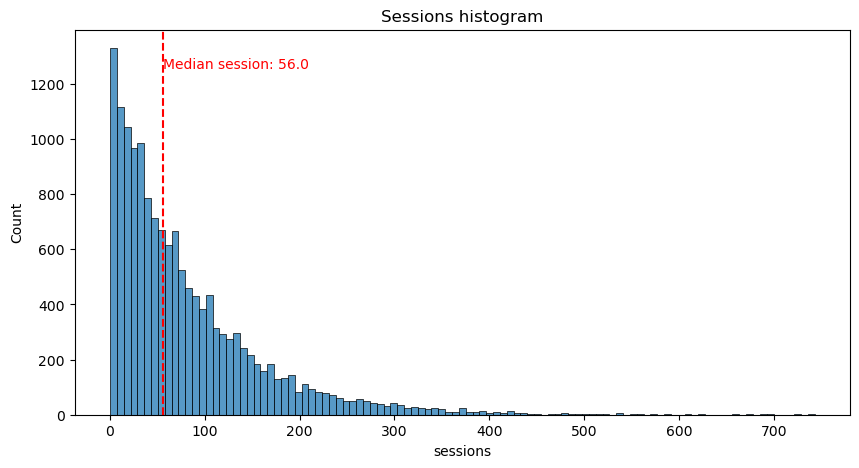

In [27]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(x = df['sessions'])

# Calculate the median session
median_session = df['sessions'].median()

# Label the median bin
ax.axvline(median_session, color = 'red', linestyle = '--', label='Median session')

# Write the median session value in the figure
ax.text(median_session, ax.get_ylim()[1] * 0.9, f'Median session: {median_session}', color='red')

# Set the title
plt.title('Sessions histogram')

# Show the plot
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

In [16]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


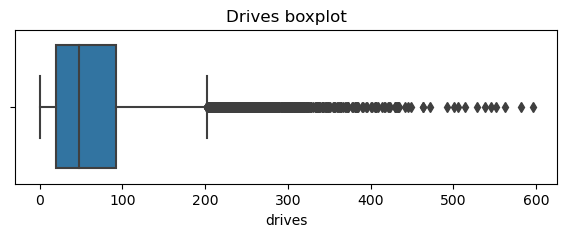

In [17]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['drives'])
plt.title('Drives boxplot')
plt.show()

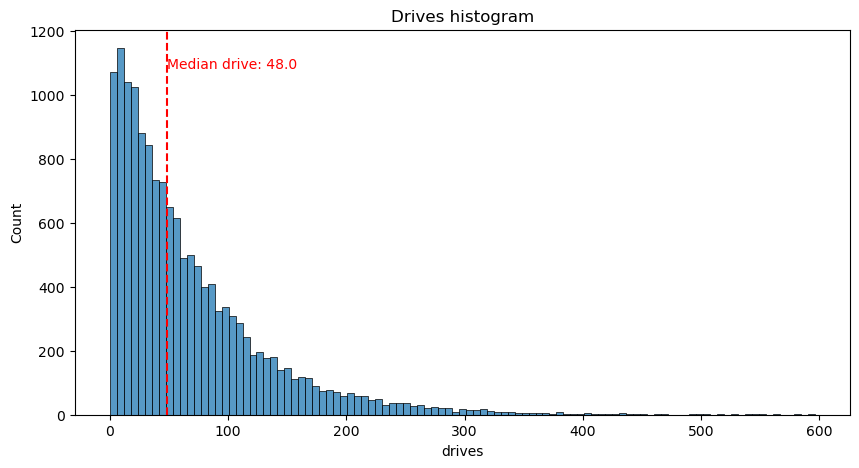

In [26]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(x = df['drives'])

# Calculate the median drive
median_drive = df['drives'].median()

# Label the median bin
ax.axvline(median_drive, color = 'red', linestyle = '--', label='Median drive')

# Write the median drive value in the figure
ax.text(median_drive, ax.get_ylim()[1] * 0.9, f'Median drive: {median_drive}', color='red')

# Set the title
plt.title('Drives histogram')

# Show the plot
plt.show()

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

In [20]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


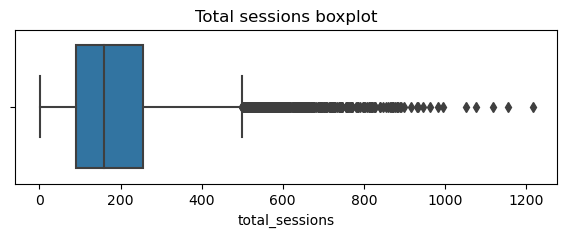

In [21]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['total_sessions'])
plt.title('Total sessions boxplot')
plt.show()

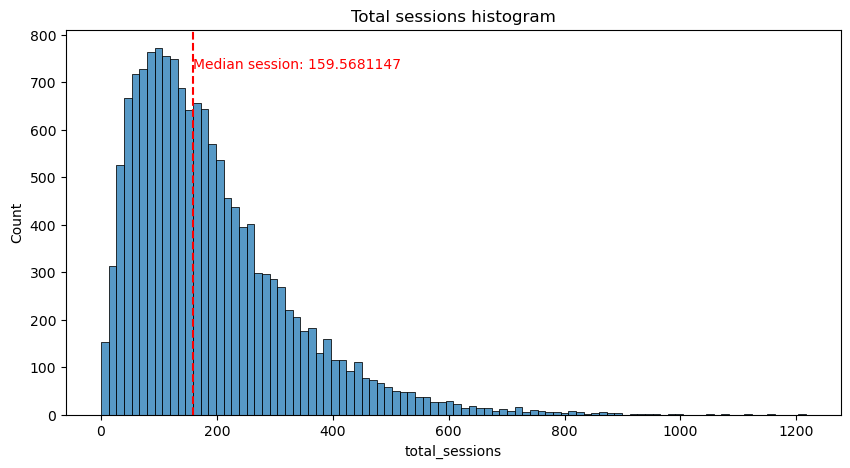

In [24]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(x = df['total_sessions'])

# Calculate the median session
median_session = df['total_sessions'].median()

# Label the median bin
ax.axvline(median_session, color = 'red', linestyle = '--', label='Median session')

# Write the median session value in the figure
ax.text(median_session, ax.get_ylim()[1] * 0.9, f'Median session: {median_session}', color='red')

# Set the title
plt.title('Total sessions histogram')

# Show the plot
plt.show()

The `total_sessions` is a right-skewed distribution that looks more normal than the previous variables. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

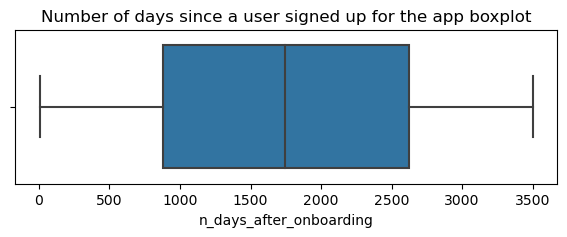

In [28]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['n_days_after_onboarding'])
plt.title('Number of days since a user signed up for the app boxplot')
plt.show()

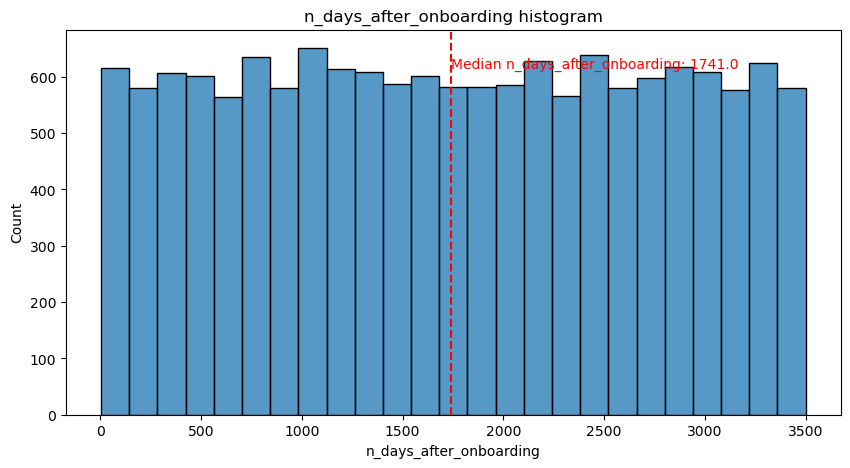

In [29]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(x = df['n_days_after_onboarding'])

# Calculate the median n_days_after_onboarding
median_n_days_after_onboarding = df['n_days_after_onboarding'].median()

# Label the median bin
ax.axvline(median_n_days_after_onboarding, color = 'red', linestyle = '--', label='Median n_days_after_onboarding')

# Write the median n_days_after_onboarding value in the figure
ax.text(median_n_days_after_onboarding, ax.get_ylim()[1] * 0.9, f'Median n_days_after_onboarding: {median_n_days_after_onboarding}', color='red')

# Set the title
plt.title('n_days_after_onboarding histogram')

# Show the plot
plt.show()

The total user tenure (i.e., number of days since onboarding) is a uniform distribution with values ranging from near-zero to ~3,500 (~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

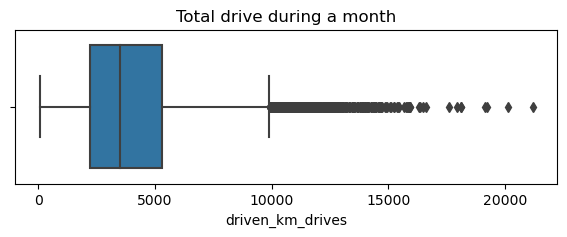

In [30]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['driven_km_drives'])
plt.title('Total drive during a month')
plt.show()

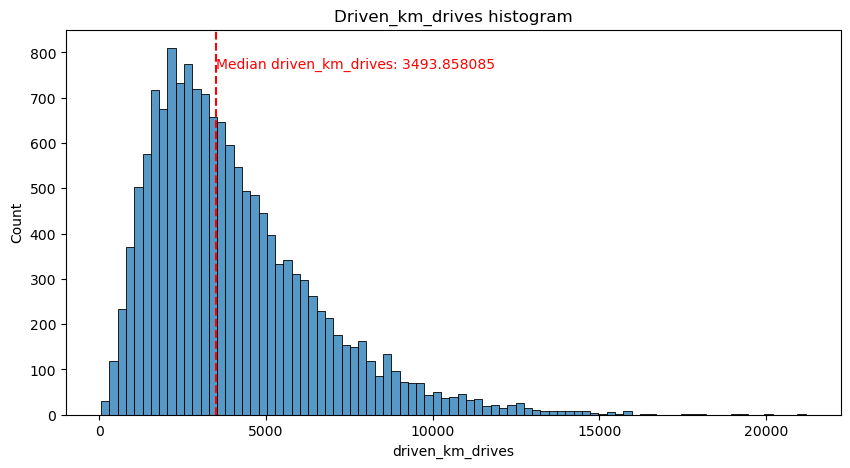

In [31]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(x = df['driven_km_drives'])

# Calculate the median driven_km_drives
median_driven_km_drives = df['driven_km_drives'].median()

# Label the median bin
ax.axvline(median_driven_km_drives, color = 'red', linestyle = '--', label='Median driven_km_drives')

# Write the median driven_km_drives value in the figure
ax.text(median_driven_km_drives, ax.get_ylim()[1] * 0.9, f'Median driven_km_drives: {median_driven_km_drives}', color='red')

# Set the title
plt.title('Driven_km_drives histogram')

# Show the plot
plt.show()

The number of drives driven in the last month per user resembles a right-skewed normal distribution with half the users driving under 3,495 kilometers. As discovered in the analysis from the previous course, the users in this dataset drive a lot. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

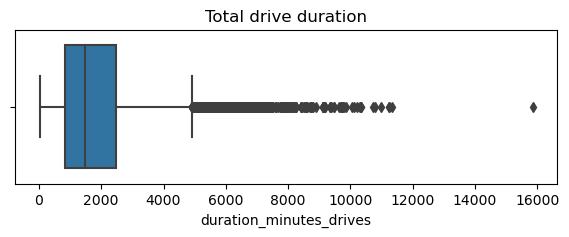

In [33]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['duration_minutes_drives'])
plt.title('Total drive duration')
plt.show()

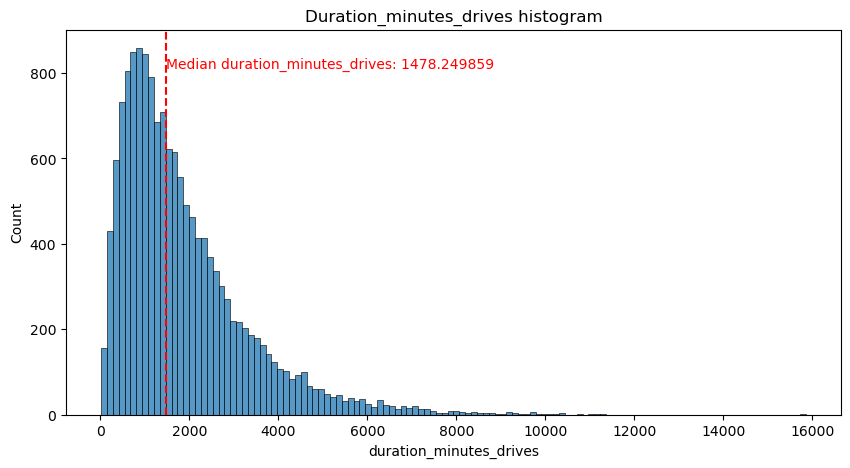

In [34]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(x = df['duration_minutes_drives'])

# Calculate the median duration_minutes_drives
median_duration_minutes_drives = df['duration_minutes_drives'].median()

# Label the median bin
ax.axvline(median_duration_minutes_drives, color = 'red', linestyle = '--', label='Median duration_minutes_drives')

# Write the median duration_minutes_drives value in the figure
ax.text(median_duration_minutes_drives, ax.get_ylim()[1] * 0.9, f'Median duration_minutes_drives: {median_duration_minutes_drives}', color='red')

# Set the title
plt.title('Duration_minutes_drives histogram')

# Show the plot
plt.show()

The `duration_minutes_drives` variable has a normalish distribution with a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

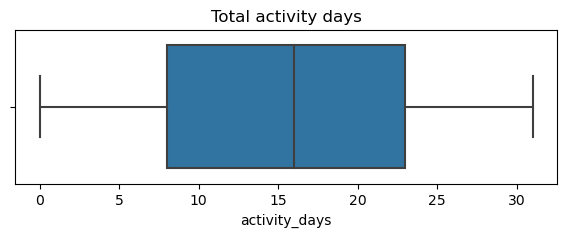

In [35]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['activity_days'])
plt.title('Total activity days')
plt.show()

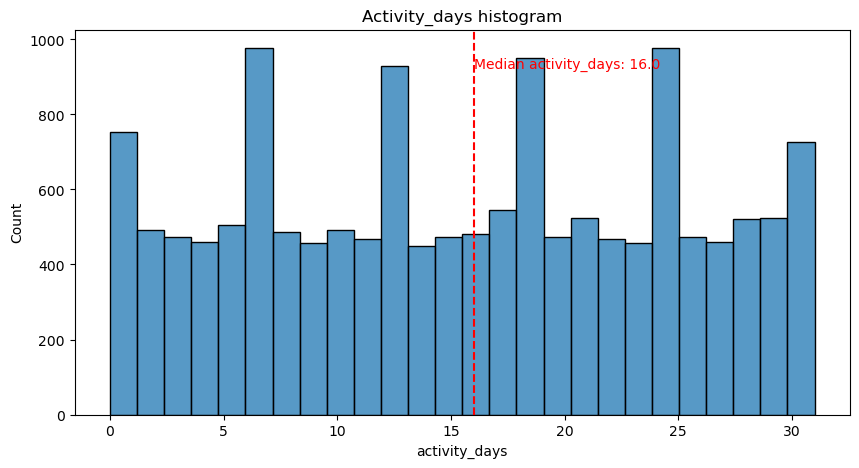

In [36]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(x = df['activity_days'])

# Calculate the median activity_days
median_activity_days = df['activity_days'].median()

# Label the median bin
ax.axvline(median_activity_days, color = 'red', linestyle = '--', label='Median activity_days')

# Write the median activity_days value in the figure
ax.text(median_activity_days, ax.get_ylim()[1] * 0.9, f'Median activity_days: {median_activity_days}', color='red')

# Set the title
plt.title('Activity_days histogram')

# Show the plot
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which one might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

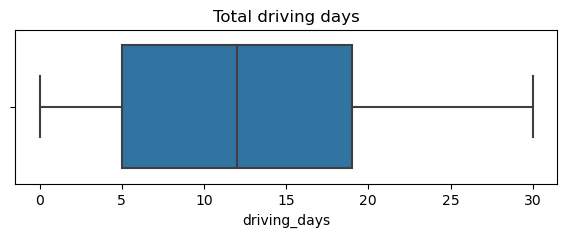

In [37]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['driving_days'])
plt.title('Total driving days')
plt.show()

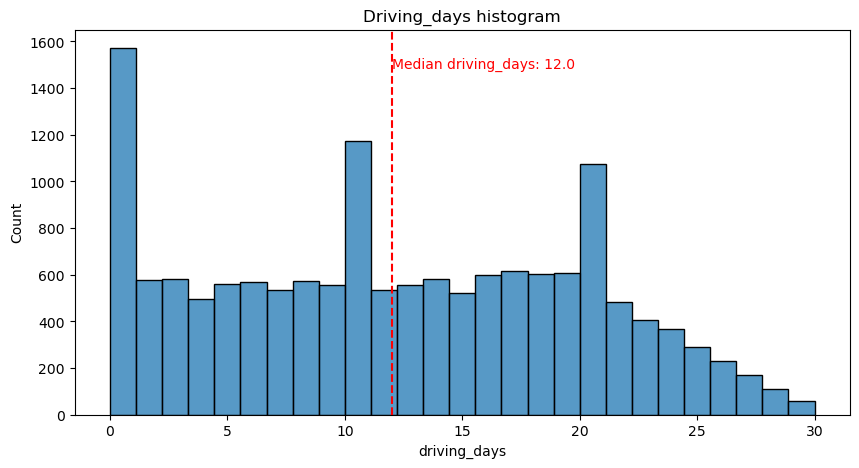

In [38]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(x = df['driving_days'])

# Calculate the median driving_days
median_driving_days = df['driving_days'].median()

# Label the median bin
ax.axvline(median_driving_days, color = 'red', linestyle = '--', label='Median driving_days')

# Write the median driving_days value in the figure
ax.text(median_driving_days, ax.get_ylim()[1] * 0.9, f'Median driving_days: {median_driving_days}', color='red')

# Set the title
plt.title('Driving_days histogram')

# Show the plot
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

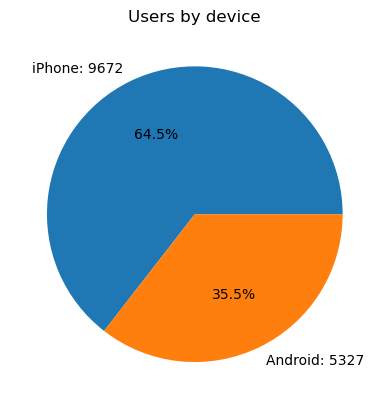

In [40]:
# Pie chart
device_data = df['device'].value_counts()
plt.pie(device_data, labels = [f'{device_data.index[0]}: {device_data.values[0]}',
                               f'{device_data.index[1]}: {device_data.values[1]}'],
                               autopct='%1.1f%%')
plt.title('Users by device')
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

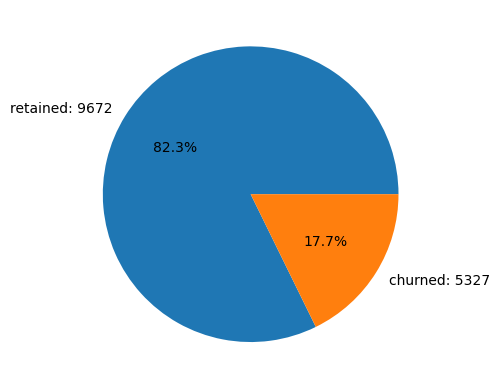

In [41]:
# Pie chart
label_data = df['label'].value_counts()
plt.pie(label_data, labels = [f'{label_data.index[0]}: {device_data.values[0]}',
                              f'{label_data.index[1]}: {device_data.values[1]}'],
                               autopct='%1.1f%%')
plt.show()

Less than 18% of the users churned.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

In [43]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


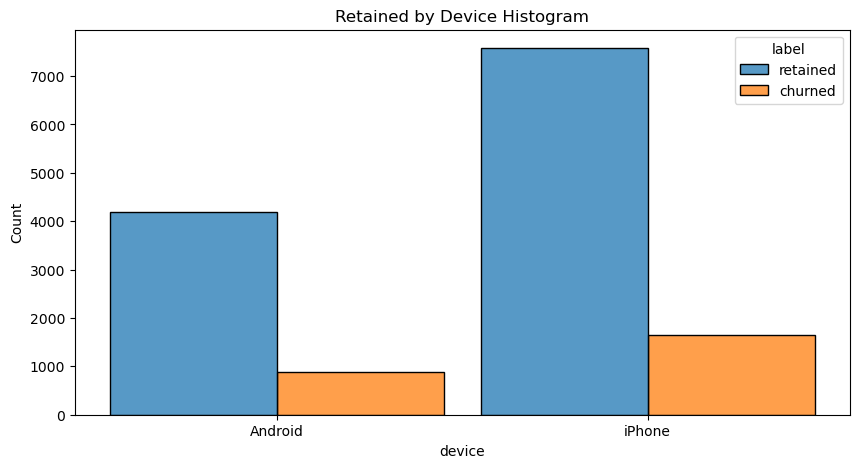

In [44]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(x=df['device'], hue=df['label'], multiple='dodge', shrink=0.9)
plt.title('Retained by Device Histogram')
plt.show()

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, we discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [47]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [48]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [49]:
# Replace infinite values with 0
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# Calculate descriptive statistics
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers per drive day. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.
Plot a histogram of the new km_per_driving_day column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. 


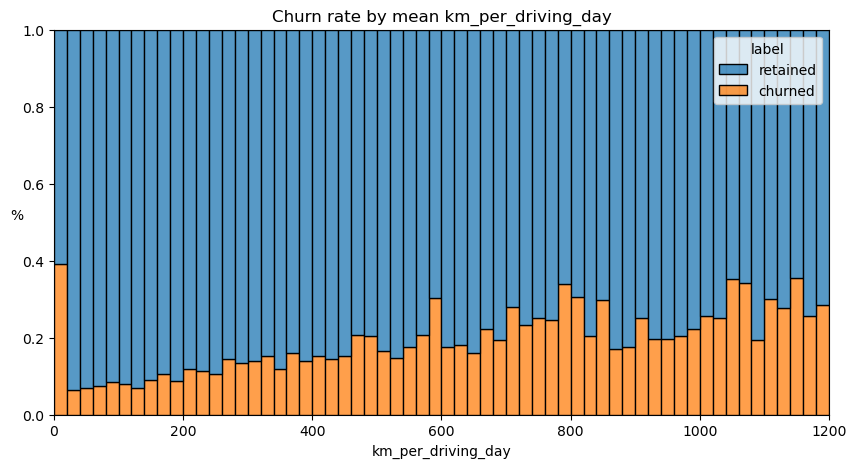

In [50]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(data=df, 
             x = 'km_per_driving_day',
             hue = 'label',
             bins = range(0,1201,20),
             multiple='fill')
plt.ylabel('%', rotation = 0)
plt.title('Churn rate by mean km_per_driving_day')
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

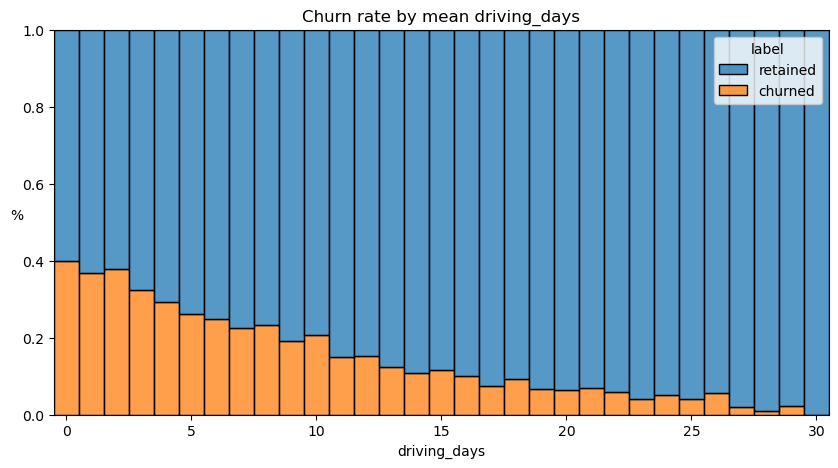

In [51]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(data=df, 
             x = 'driving_days',
             bins = range(0,31),
             hue = 'label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation = 0)
plt.title('Churn rate by mean driving_days')
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

### **Task 4. Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

4. What percentage of users churned and what percentage were retained?

5. What factors correlated with user churn? How?

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?


Answer 1: Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.

Answer 2: Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as driven_km_drives. Some of the monthly variables also might be problematic, such as activity_days and driving_days, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.

Answer 3: Yes. I'd want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?

Answer 4: Less than 18% of users churned, and ~82% were retained.

Answer 5: Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.

Answer 6: No. Users of all tenures from brand new to ~10 years were relatively evenly represented in the data. This is borne out by the histogram for n_days_after_onboarding, which reveals a uniform distribution for this variable.